First, we need to import all the libraries I am going to use. I will use pandas dataframes for data manipulation. I will use seaborn for graphs. I will use sklearn for decision tree algorithms. 

In [1]:
import  pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
cancerdata = pd.read_csv('CancerPrediction.csv')

In [3]:
classifier = DecisionTreeClassifier()

In [4]:
cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
cancerdata.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')>

In [6]:
y = cancerdata[['diagnosis']]

In [7]:
y.describe()

,diagnosis
count,569
unique,2
top,B
freq,357


In [8]:
x = cancerdata[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

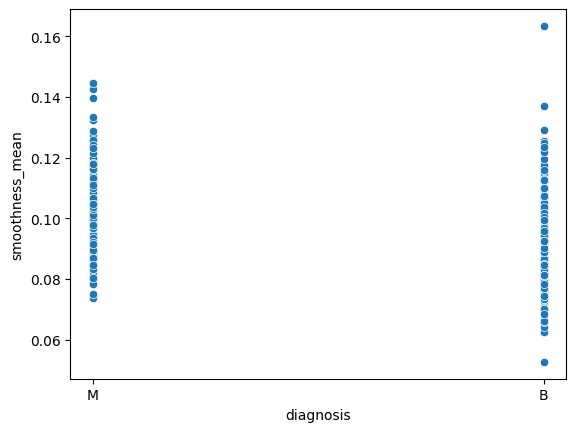

In [9]:
ax = sns.scatterplot(data=cancerdata, x = 'diagnosis', y = 'smoothness_mean')

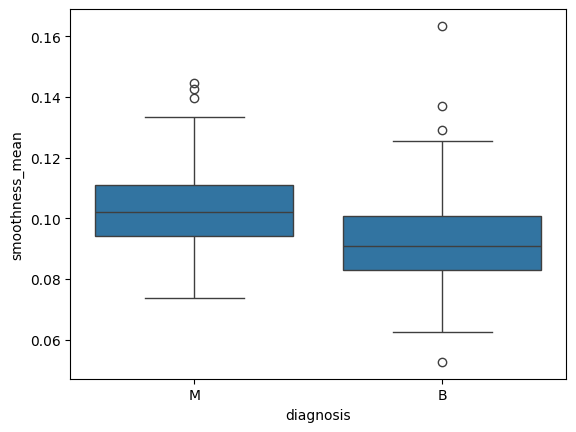

In [10]:
ax = sns.boxplot(data=cancerdata, x = 'diagnosis', y = 'smoothness_mean')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.5)

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 353 to 323
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             284 non-null    float64
 1   texture_mean            284 non-null    float64
 2   perimeter_mean          284 non-null    float64
 3   area_mean               284 non-null    float64
 4   smoothness_mean         284 non-null    float64
 5   compactness_mean        284 non-null    float64
 6   concavity_mean          284 non-null    float64
 7   concave points_mean     284 non-null    float64
 8   symmetry_mean           284 non-null    float64
 9   fractal_dimension_mean  284 non-null    float64
dtypes: float64(10)
memory usage: 24.4 KB


In [13]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 481 to 388
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             285 non-null    float64
 1   texture_mean            285 non-null    float64
 2   perimeter_mean          285 non-null    float64
 3   area_mean               285 non-null    float64
 4   smoothness_mean         285 non-null    float64
 5   compactness_mean        285 non-null    float64
 6   concavity_mean          285 non-null    float64
 7   concave points_mean     285 non-null    float64
 8   symmetry_mean           285 non-null    float64
 9   fractal_dimension_mean  285 non-null    float64
dtypes: float64(10)
memory usage: 24.5 KB


In [14]:
model = classifier.fit(x_train, y_train)

In [15]:
model.score(x_train,y_train)

1.0

In [16]:
model.score(x_test,y_test)

0.8982456140350877

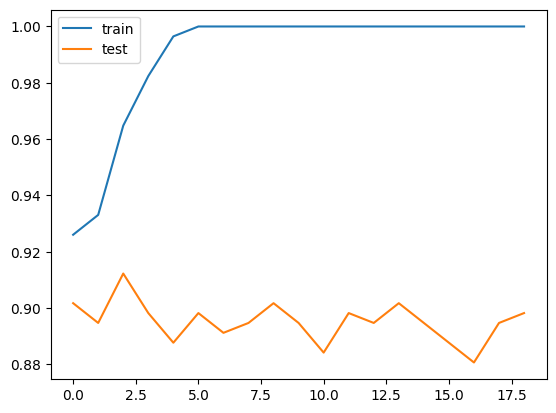

In [17]:
test_scores = []
train_scores = []
for i in range(1,20):
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(x_train, y_train)
    test_scores.append(dt.score(x_test, y_test))
    train_scores.append(dt.score(x_train, y_train))
ax = pd.DataFrame({'train':train_scores, 'test': test_scores}).plot.line()

In [20]:
from matplotlib import pyplot as plt

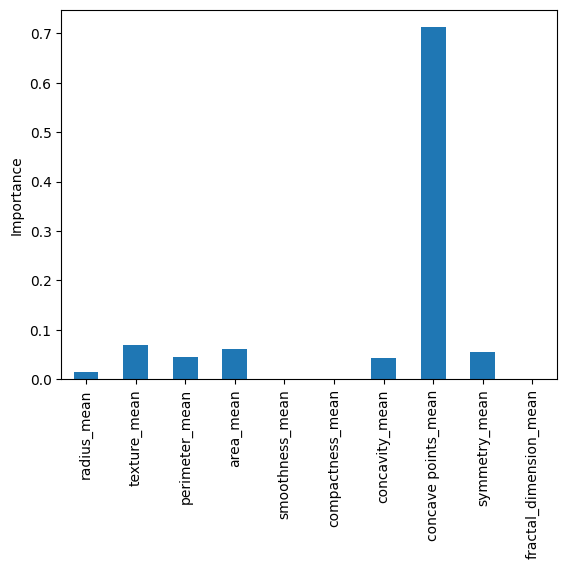

In [21]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = x.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

In [25]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_ = gcv.best_estimator_
model_.fit(x_train, y_train)

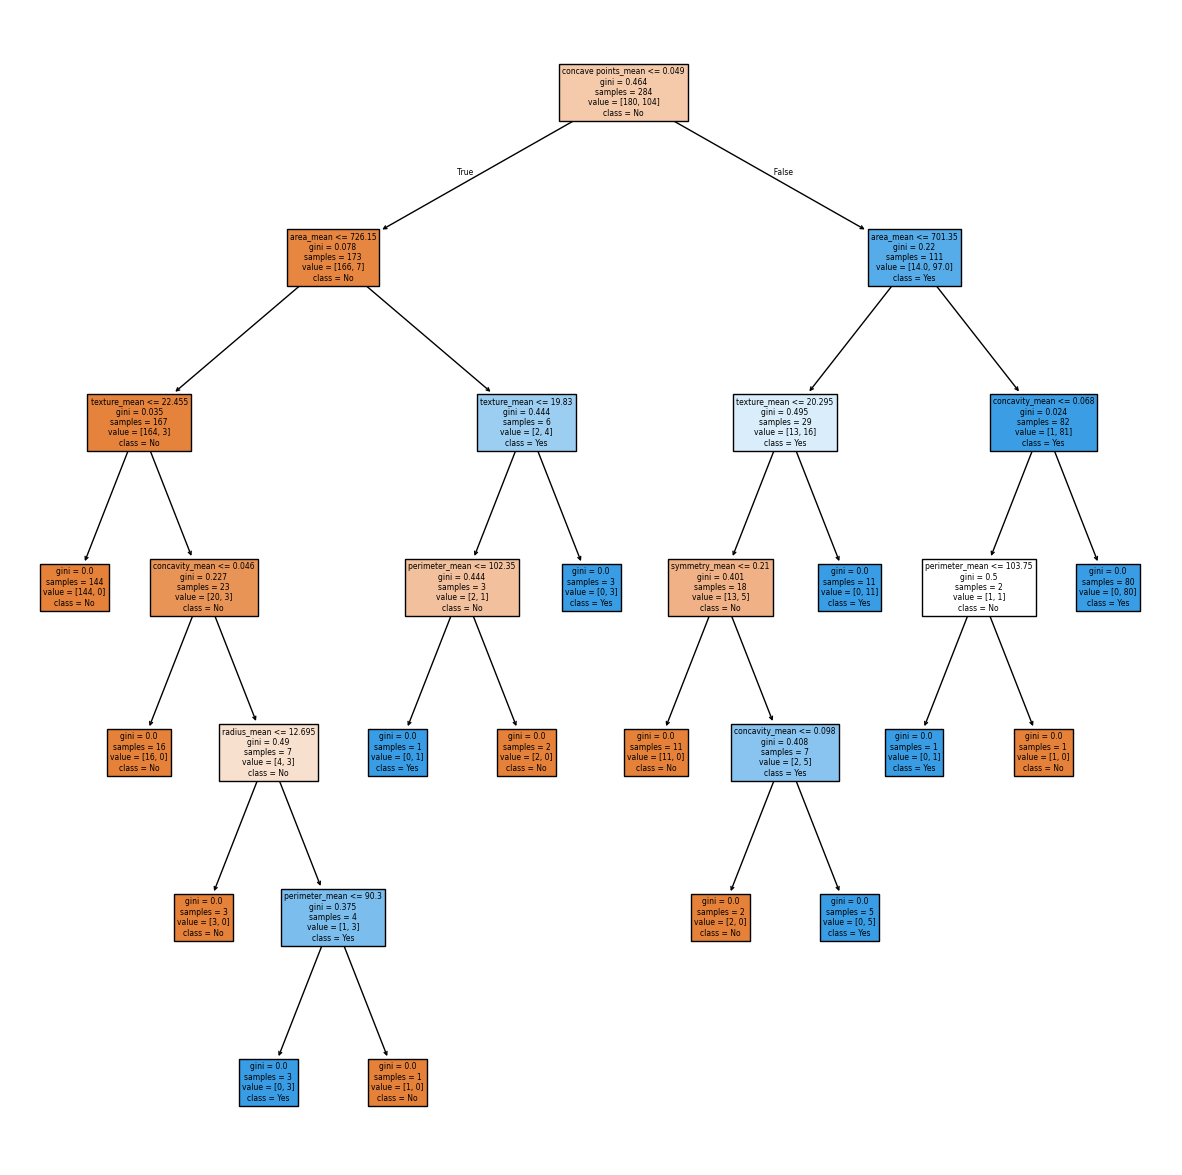

In [29]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(dt, 
                   feature_names = list(x.columns), 
                   class_names = ['No','Yes'],
                   filled = True);